In [4]:
import sys
import os

# Get the absolute path of the current directory (notebooks)
current_dir = os.getcwd()

# Get the path of the parent directory (root)
parent_dir = os.path.dirname(current_dir)

# Add the parent directory to sys.path if it's not already there
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# NOW try the import
try:
    from src.preprocessing import clean_and_prepare_data
    print("✅ Success! 'src' module found and imported.")
except ModuleNotFoundError:
    print("❌ Still not found. Please ensure your folder is named 'src' and contains an '__init__.py' file.")

✅ Success! 'src' module found and imported.


In [5]:
from src.preprocessing import clean_and_prepare_data
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd

# Load and preprocess
X_train, X_test, y_train, y_test, scaler = clean_and_prepare_data('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(f"Original Training Shape: {X_train.shape}")
print(f"Original Churn Ratio: {y_train.mean():.2%}")

Original Training Shape: (5625, 30)
Original Churn Ratio: 26.58%


In [6]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample ONLY the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"Resampled Training Shape: {X_train_res.shape}")
print(f"Resampled Churn Ratio: {y_train_res.mean():.2%}")

Resampled Training Shape: (8260, 30)
Resampled Churn Ratio: 50.00%


In [7]:
# Train Baseline
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_res, y_train_res)

# Evaluate
y_pred_lr = lr_model.predict(X_test)
print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_lr))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.51      0.74      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407



In [8]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Evaluate
y_pred_rf = rf_model.predict(X_test)
print("--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf))

--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1033
           1       0.55      0.64      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.77      1407



In [9]:
lr_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"Logistic Regression AUC: {lr_auc:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")

Logistic Regression AUC: 0.8273
Random Forest AUC: 0.8141


In [10]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample ONLY the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"Resampled Training Shape: {X_train_res.shape}")
print(f"Resampled Churn Ratio: {y_train_res.mean():.2%}")

Resampled Training Shape: (8260, 30)
Resampled Churn Ratio: 50.00%


In [11]:
# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_res, y_train_res)
y_pred_lr = lr_model.predict(X_test)

# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)

print("--- Logistic Regression (Class 1 Recall) ---")
print(classification_report(y_test, y_pred_lr))

print("\n--- Random Forest (Class 1 Recall) ---")
print(classification_report(y_test, y_pred_rf))

--- Logistic Regression (Class 1 Recall) ---
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.51      0.74      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407


--- Random Forest (Class 1 Recall) ---
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1033
           1       0.55      0.64      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.77      1407



In [12]:
print(roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

0.8141400624317314


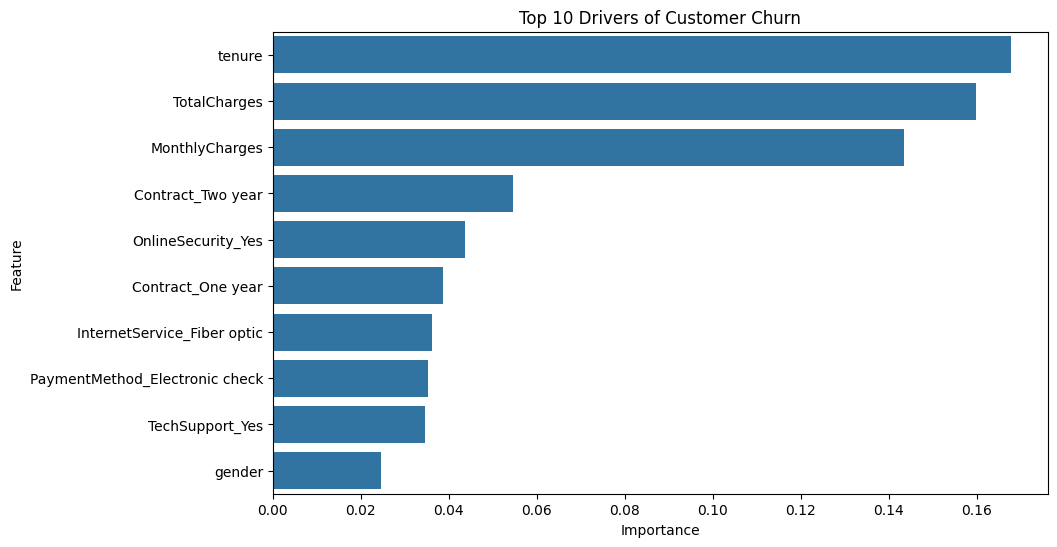

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from our Random Forest
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Drivers of Customer Churn')
plt.show()